In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotly.offline import iplot
import seaborn as sns


In [2]:
# load data
df = pd.read_csv('data/usa_01.csv')
df

,YEAR,SEX,AGE,RACE,RACED,CITIZEN,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD,OCC
0,2009,1,51,1,100,0,0,0,0,0,0
1,2009,2,64,1,100,0,0,0,0,0,5310
2,2009,1,68,1,100,0,0,0,0,0,6200
3,2009,2,61,2,200,0,0,0,0,0,4020
4,2009,1,38,2,200,0,0,0,0,0,5350
...,...,...,...,...,...,...,...,...,...,...,...
31290938,2018,2,9,1,100,0,3,33,0,0,0
31290939,2018,2,7,1,100,0,3,31,0,0,0
31290940,2018,2,49,1,100,0,0,0,0,0,3603
31290941,2018,2,19,1,100,0,0,0,0,0,4255


In [16]:
df.describe()

,YEAR,AGE,RACE,RACED,CITIZEN,GRADEATT,GRADEATTD,DEGFIELD,DEGFIELDD
count,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07,3.129094e+07
mean,2.013546e+03,4.066429e+01,1.774115e+00,1.792336e+02,2.941709e-01,1.064536e+00,1.101986e+01,9.552488e+00,9.565275e+02
std,2.870409e+00,2.353897e+01,1.831435e+00,1.873933e+02,8.125947e-01,2.023393e+00,2.079990e+01,1.964634e+01,1.966719e+03
min,2.009000e+03,0.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.011000e+03,2.000000e+01,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.014000e+03,4.100000e+01,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.016000e+03,5.900000e+01,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.018000e+03,9.700000e+01,9.000000e+00,9.910000e+02,3.000000e+00,7.000000e+00,7.000000e+01,6.400000e+01,6.403000e+03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31290943 entries, 0 to 31290942
Data columns (total 11 columns):
 #   Column     Dtype
---  ------     -----
 0   YEAR       int64
 1   SEX        int64
 2   AGE        int64
 3   RACE       int64
 4   RACED      int64
 5   CITIZEN    int64
 6   GRADEATT   int64
 7   GRADEATTD  int64
 8   DEGFIELD   int64
 9   DEGFIELDD  int64
 10  OCC        int64
dtypes: int64(11)
memory usage: 2.6 GB


In [4]:
df.isnull().sum(axis = 0)

YEAR         0
SEX          0
AGE          0
RACE         0
RACED        0
CITIZEN      0
GRADEATT     0
GRADEATTD    0
DEGFIELD     0
DEGFIELDD    0
OCC          0
dtype: int64

In [5]:
import copy
df_origin = copy.deepcopy(df)

In [6]:
import copy
df = copy.deepcopy(df_origin)

## Data Preprocessing

In [7]:
from collections import Counter
Counter(df['SEX'])

Counter({1: 15270492, 2: 16020451})

In [8]:
# code interpretation
df['SEX'] = df['SEX'].apply(lambda x: 'Male' if str(x) == '1' else 'Femal')

### Revise range

In [12]:
#
df['OCC'] = df['OCC'].apply(lambda x: 'STEM'if x in range(1000, 2000) else 'NON-STEM')
df['OCC']

0           NON-STEM
1           NON-STEM
2           NON-STEM
3           NON-STEM
4           NON-STEM
              ...   
31290938    NON-STEM
31290939    NON-STEM
31290940    NON-STEM
31290941    NON-STEM
31290942    NON-STEM
Name: OCC, Length: 31290943, dtype: object

In [13]:
Counter(df['OCC'])

Counter({'NON-STEM': 30364353, 'STEM': 926590})

## Data Visualization

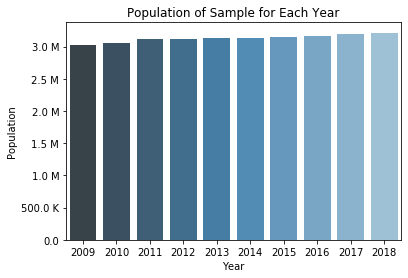

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val > 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', data=df, palette="Blues_d")
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel("Year")
ax.axes.set_title("Population of Sample for Each Year")
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

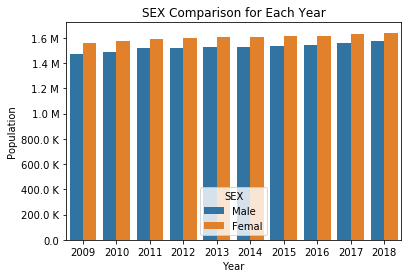

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val > 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.countplot(x='YEAR', hue='SEX', data=df)
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel('Year')
ax.axes.set_title('SEX Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

In [42]:
occupations = dict(Counter(df['OCC']))
occupations_years = dict()
for o in occupations.keys():
    years = dict(zip(Counter(df['YEAR']).keys(), [0]*len(Counter(df['YEAR']).keys())))
    years_new = dict(Counter(df[df['OCC']==o]['YEAR']))
    for y in years:
        years[y] += years_new[y]
    occupations_years[o] = years
occupations_years
    

{'NON-STEM': {2009: 2943529,
  2010: 2976933,
  2011: 3030016,
  2012: 3028564,
  2013: 3041881,
  2014: 3040702,
  2015: 3052144,
  2016: 3057794,
  2017: 3086850,
  2018: 3105940},
 'STEM': {2009: 87199,
  2010: 84759,
  2011: 82001,
  2012: 84466,
  2013: 90914,
  2014: 91908,
  2015: 94861,
  2016: 98693,
  2017: 103190,
  2018: 108599}}

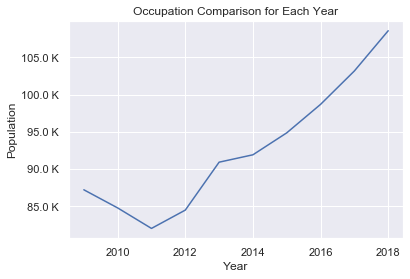

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

# plt.figure(figsize=[60,30])
ax = sns.lineplot(x=list(occupations_years['STEM'].keys()), y=list(occupations_years['STEM'].values()))
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('Population')
ax.set_xlabel('Year')
ax.axes.set_title('Occupation Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()

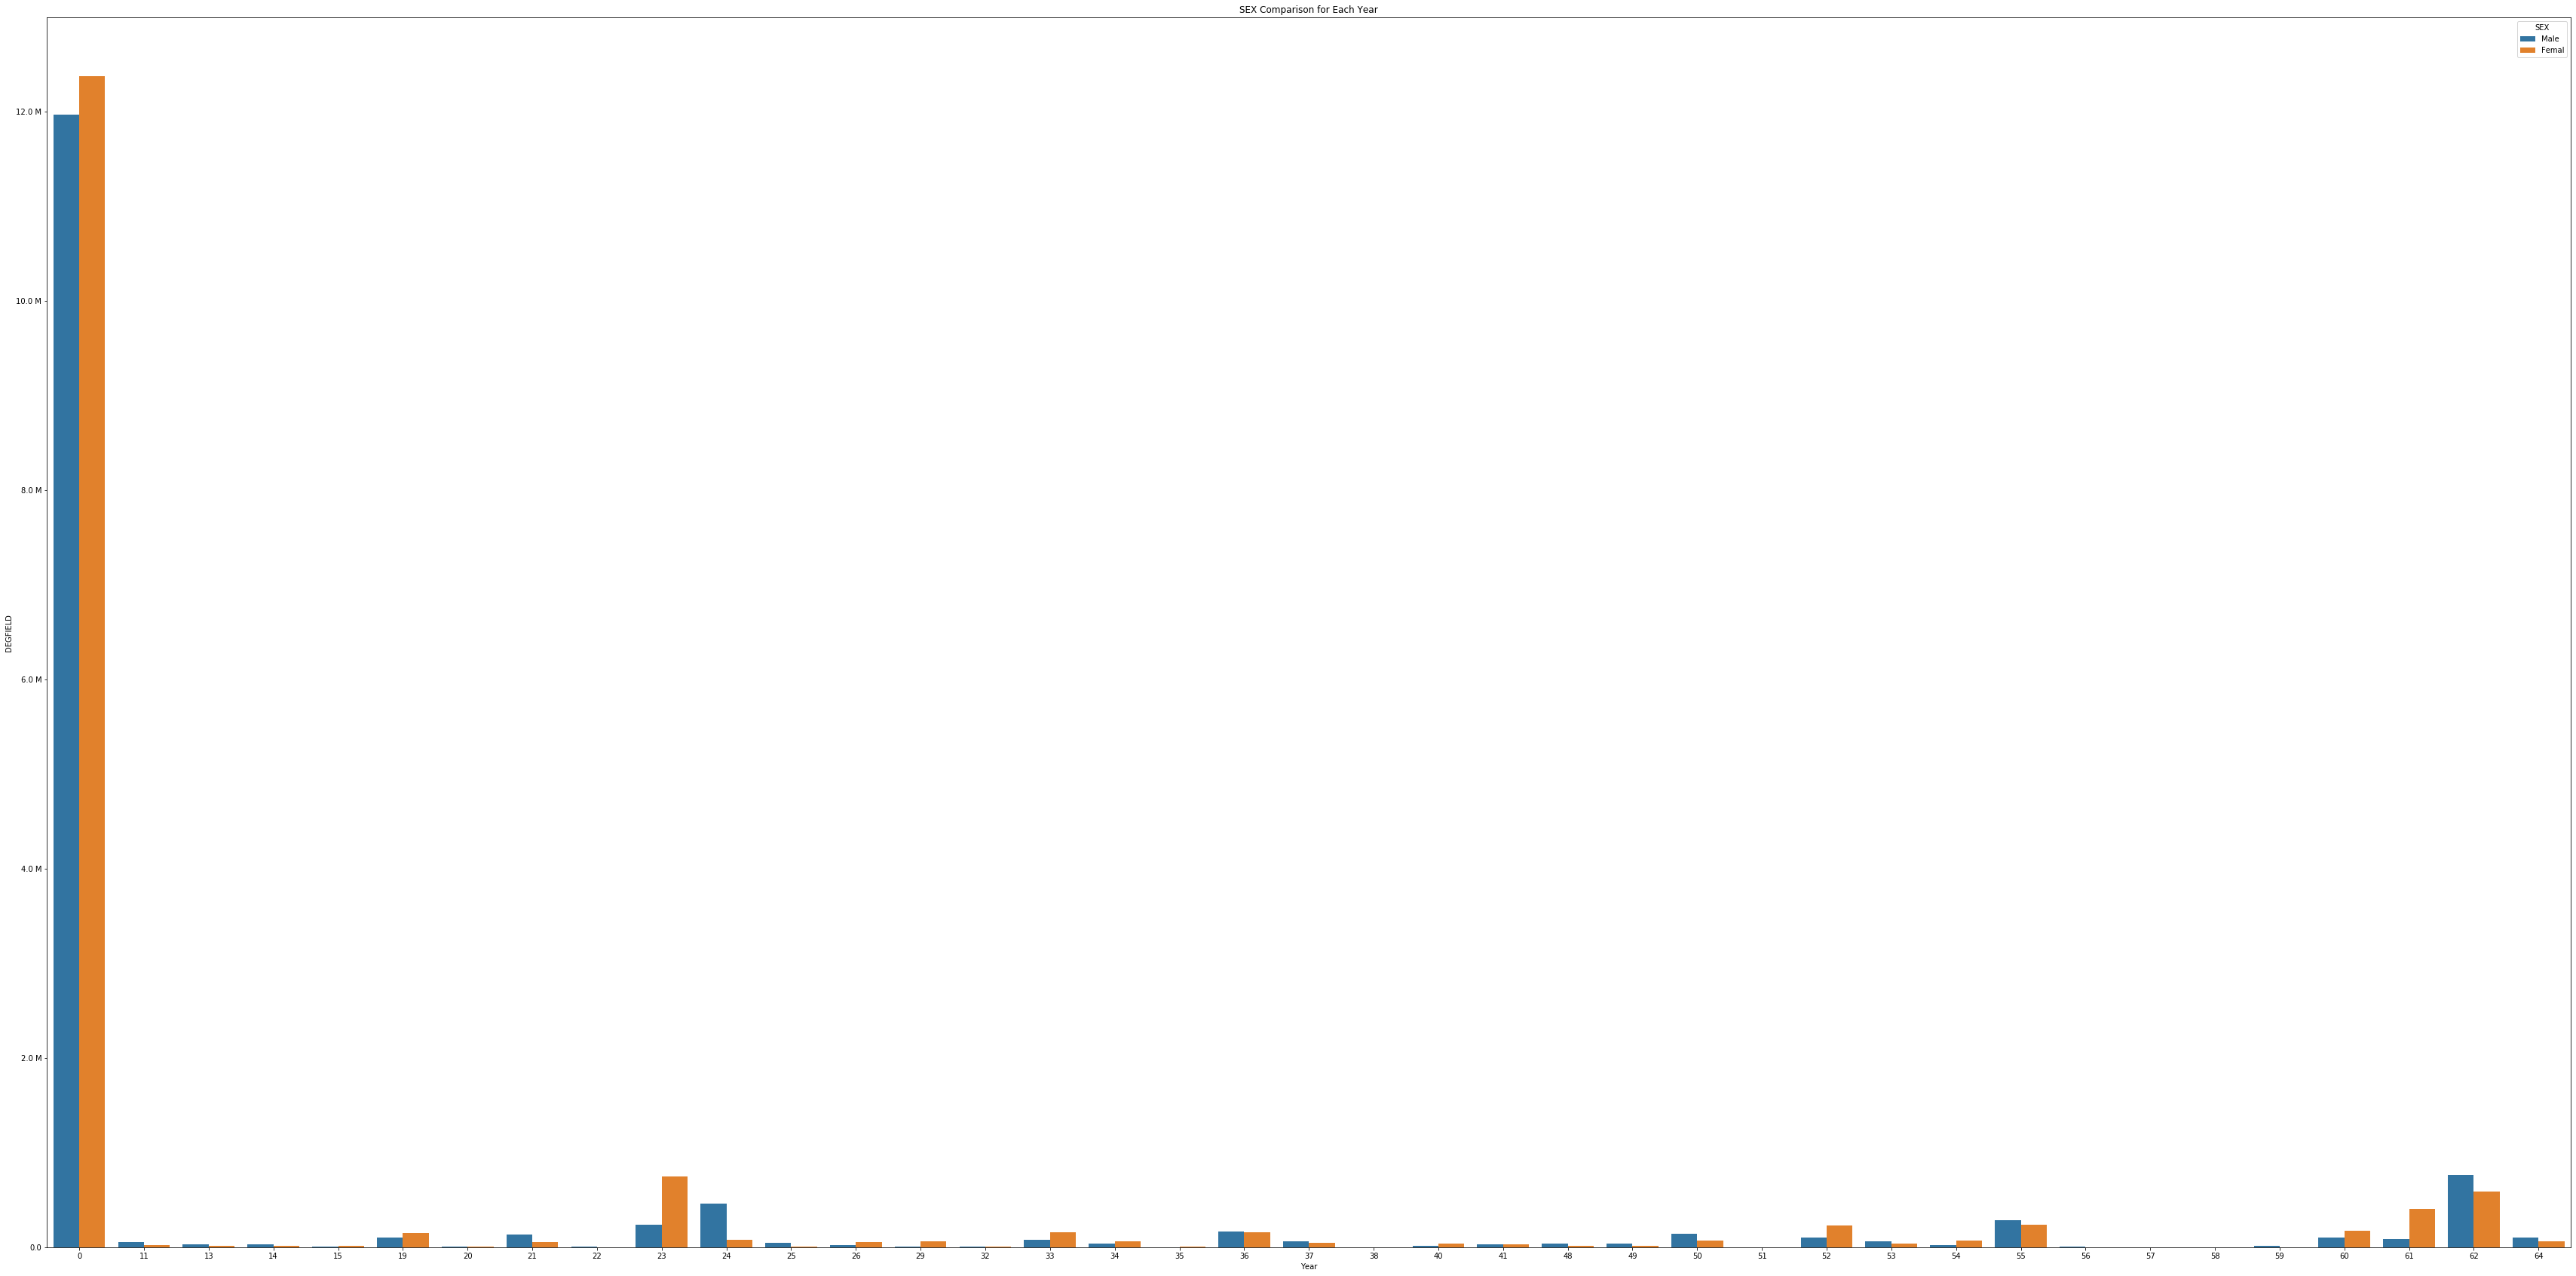

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.ticker as tick

# Auto adjust unit of y Axis
def y_fmt(tick_val, pos):
    if tick_val >= 1000000:
        val = int(tick_val)/1000000
        return '{:.1f} M'.format(val)
    elif tick_val > 1000:
        val = int(tick_val) / 1000
        return '{:.1f} K'.format(val)
    else:
        return tick_val

plt.figure(figsize=[60,30])
ax = sns.countplot(x='DEGFIELD', hue='SEX', data=df)
ax = pl.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
ax.set_ylabel('DEGFIELD')
ax.set_xlabel('Year')
ax.axes.set_title('SEX Comparison for Each Year')
# ax.tick_params(labelsize=40)
# plt.xticks(rotation=45)
plt.show()